## Delta

In [ ]:
options(repr.plot.width=13, repr.plot.height=13)

# Libraries
library(tidyverse)
library(viridis)
library(patchwork)
# library(hrbrthemes)
library(circlize)
library(chorddiag)  #devtools::install_github("mattflor/chorddiag")

dataD <- read.csv("./output_files/2021JulAugSep/cross_sym_matrixDelta.csv", header=TRUE)
dataD <- dataD[,-1]

colnames(dataD) = colnames(dataD)
rownames(dataD) <- colnames(dataD)

#0-1 Normalization 
# for(i in 1: nrow(dataD)){
#     dataD[i,] = dataD[i,]/sum(dataD[i,] )
# }

############    keep top 3 values for each row  ############
top_num = 3
# top_value_together = sort(c(t(data)),decreasing = TRUE)[30]
for(r in 1:nrow(dataD)){
    top_value = sort(dataD[r,],decreasing = TRUE)[top_num]
    for(c in 1:ncol(dataD)){
        dataD[r,c] = dataD[r,c] * (dataD[r,c] >= top_value)
    }
}
############################################################
data_long <- dataD %>%
  rownames_to_column %>%
  gather(key = 'key', value = 'value', -rowname)

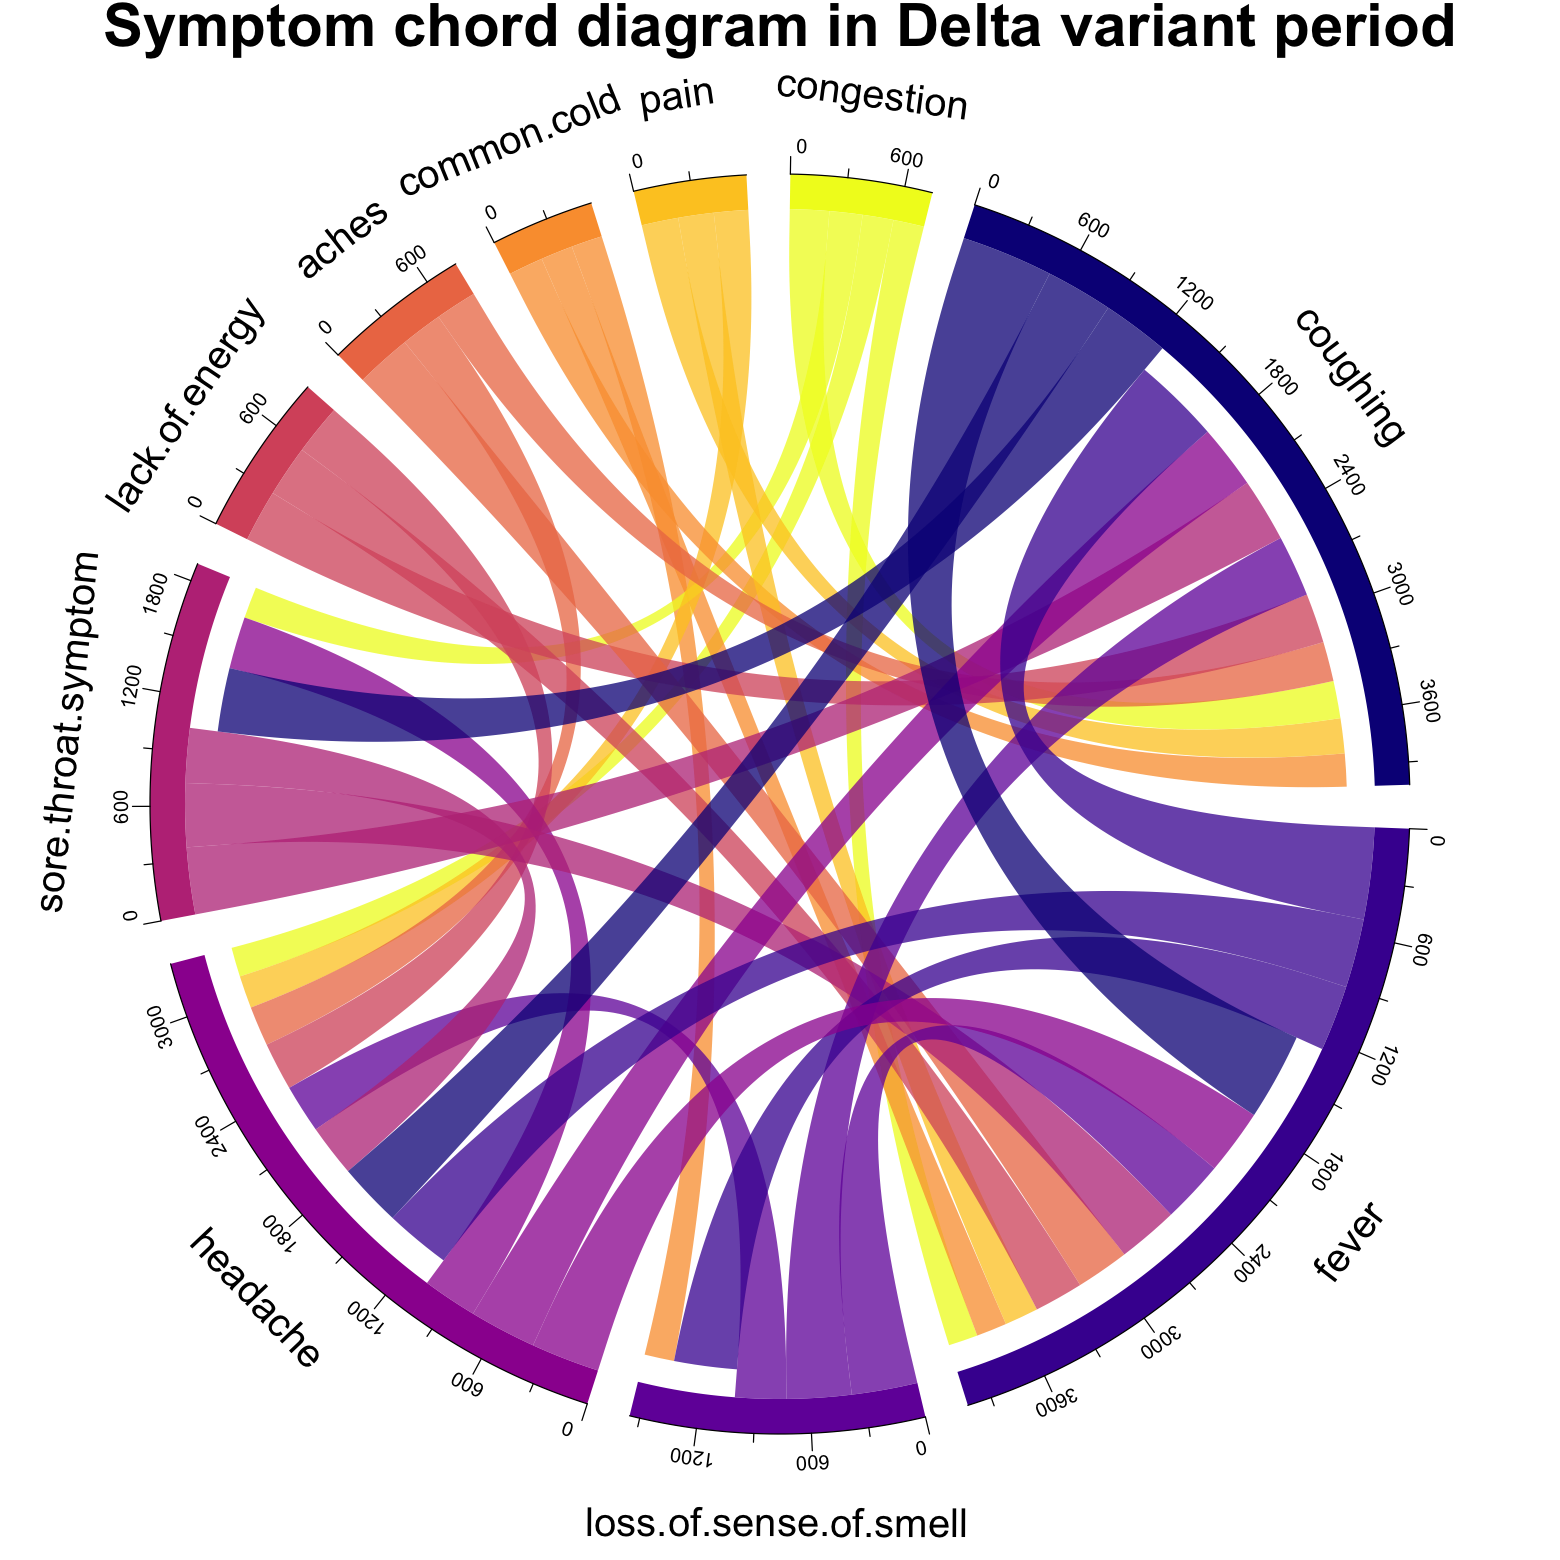

In [659]:
circos.clear()
circos.par(start.degree = 72, gap.degree = 4, track.margin = c(-0.1, 0.1), points.overflow.warning = FALSE)
par(mar = c(0,0,2,0))

# color palette
mycolor <- viridis(nrow(dataD), alpha = 1, begin = 0, end = 1, option = "C")

# Base plot
chordDiagram(
  x = data_long, 
  grid.col = mycolor,
  transparency = 0.25,
  directional = 1,
  direction.type = "diffHeight", #c("arrows", "diffHeight"), 
  diffHeight  = -0.04,
  annotationTrack = "grid", 
  annotationTrackHeight = c(0.05, 0.1),
  link.arr.type = "big.arrow", 
  link.sort = TRUE, 
  link.largest.ontop = TRUE)
title("Symptom chord diagram in Delta variant period", cex.main  =3 )

# Add text and axis
circos.trackPlotRegion(
  track.index = 1, 
  bg.border = NA, 
  panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    sector.index = get.cell.meta.data("sector.index")
      
    #Add names to the sector. 
    circos.text(
      x = mean(xlim), #0.8,
      y = 3.5, 
      labels = sector.index, 
      facing = "inside", #inside, outside, clockwise, reverse.clockwise, bending.inside and bending.outside
      cex = 2,
      niceFacing = TRUE ,
      )

    # Add graduation on axis
    circos.axis(
      h = "top", 
#   major.at = seq(from = 0, to = xlim[2], by = ifelse(test = xlim[2]>10, yes = 2, no = 1)), 
      minor.ticks = 1, 
      major.tick.length = 0.5,
      labels.niceFacing = FALSE)
  }
)

## Omicron

In [654]:
options(repr.plot.width=13, repr.plot.height=13)

# Libraries
library(tidyverse)
library(viridis)
library(patchwork)
# library(hrbrthemes)
library(circlize)
library(chorddiag)  #devtools::install_github("mattflor/chorddiag")

dataO <- read.csv("./output_files/2021Dec2022Mar/cross_sym_matrixOmicron.csv", header=TRUE)
dataO <- dataO[,-1]

colnames(dataO) = colnames(dataO)
rownames(dataO) <- colnames(dataO)
dataO = dataO[rownames(dataD), colnames(dataD)] # make order the same with Delta symptoms

#0-1 Normalization 
# for(i in 1: nrow(dataO)){
#     dataO[i,] = dataO[i,]/sum(dataO[i,] )
# }

top_num = 3
# top_value_together = sort(c(t(data)),decreasing = TRUE)[30]
for(r in 1:nrow(dataO)){
    top_value = sort(dataO[r,],decreasing = TRUE)[top_num]
    for(c in 1:ncol(dataO)){
        dataO[r,c] = dataO[r,c] * (dataO[r,c] >= top_value)
    }
}

#long format
data_long <- dataO %>%
  rownames_to_column %>%
  gather(key = 'key', value = 'value', -rowname)

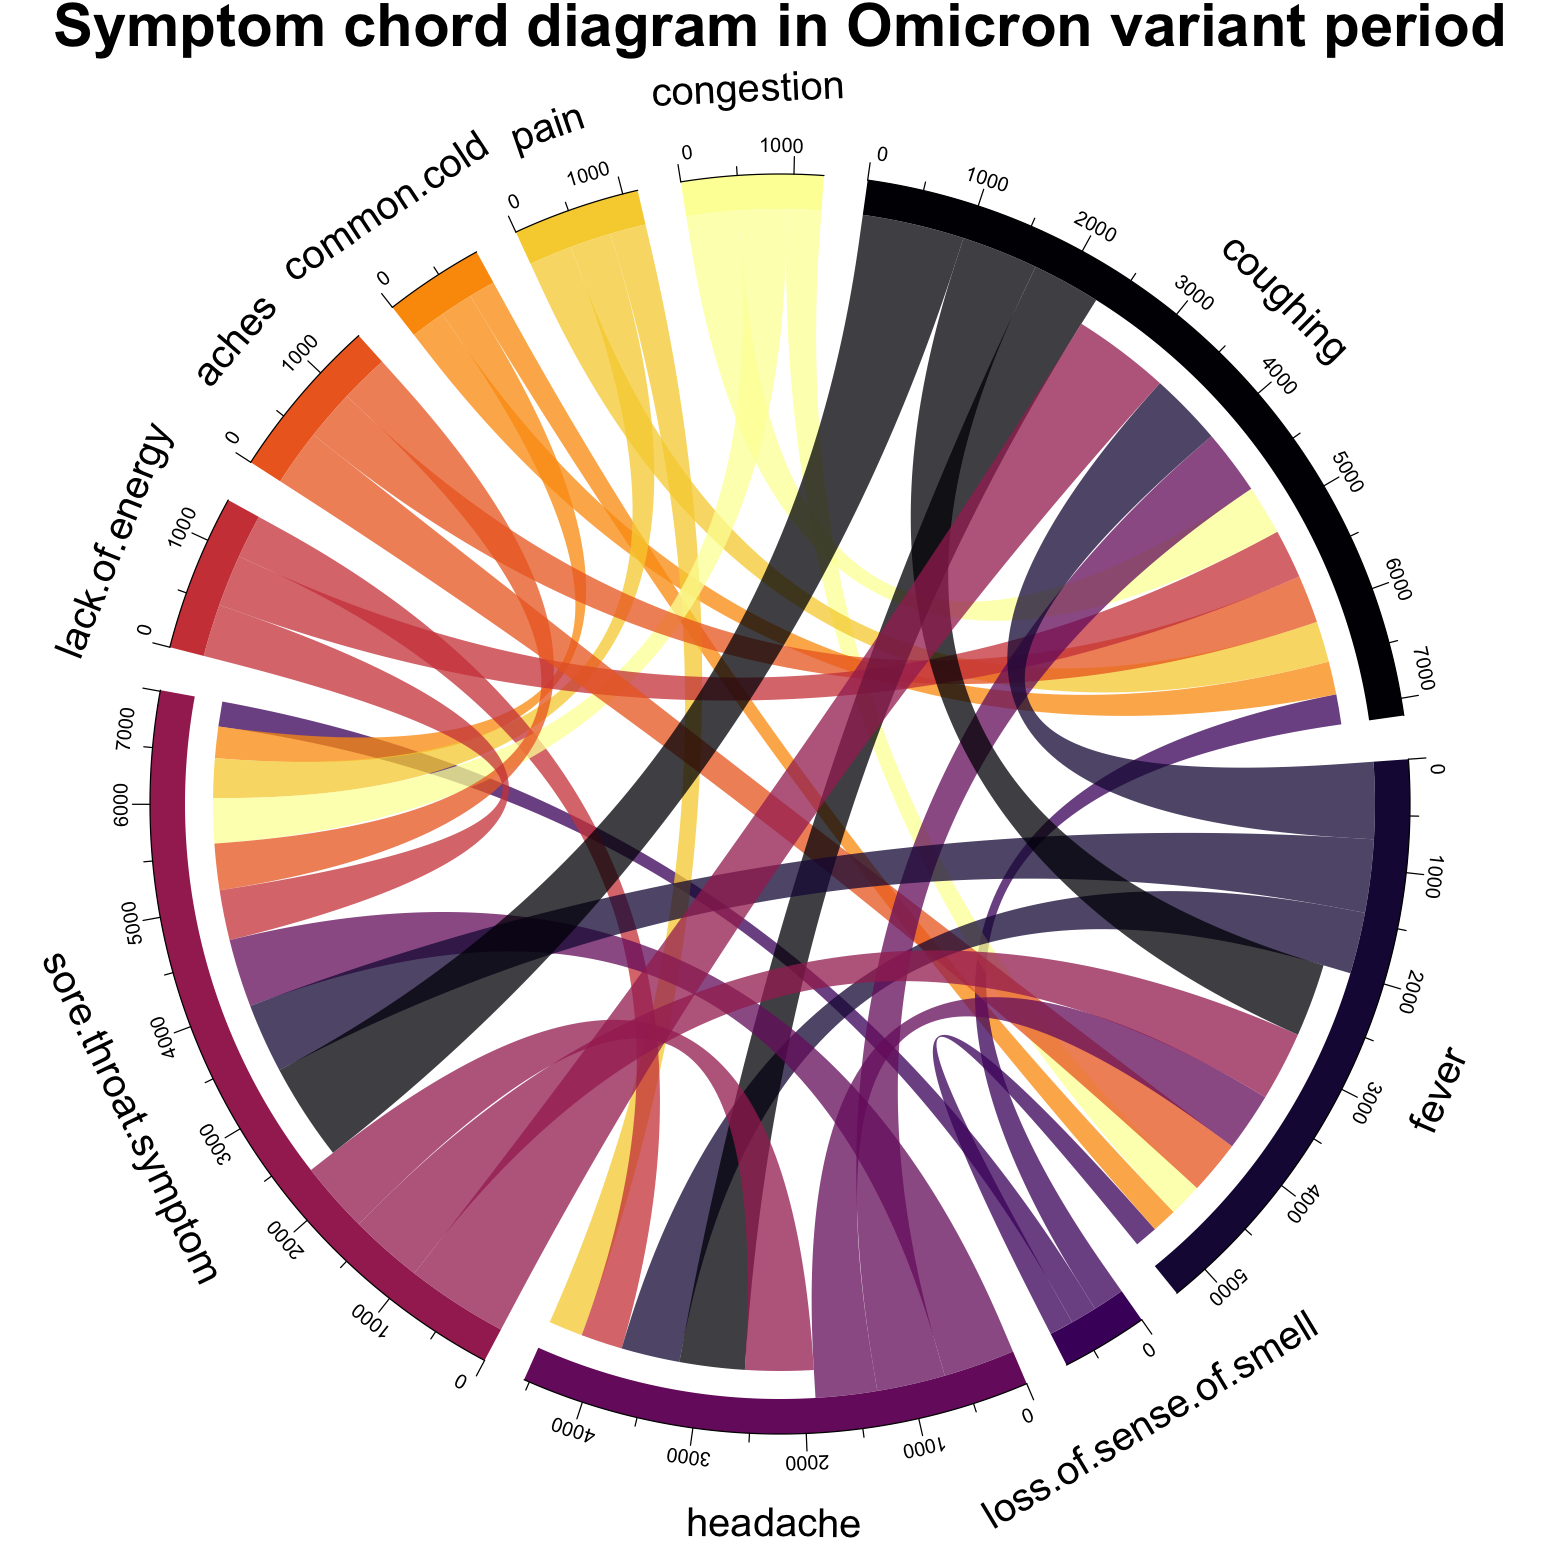

In [655]:
# parameters
circos.clear()
circos.par(start.degree = 82, gap.degree = 4, track.margin = c(-0.1, 0.1), points.overflow.warning = FALSE)
par(mar = c(0,0,2,0))

# color palette
mycolor <- viridis(nrow(data), alpha = 1, begin = 0, end = 1, option = "B")

# Base plot
chordDiagram(
  x = data_long, 
  grid.col = mycolor,
  transparency = 0.25,
  directional = 1,
  direction.type = 'diffHeight', #c("arrows", "diffHeight"), 
  diffHeight  = -0.04,
  annotationTrack = "grid", 
  annotationTrackHeight = c(0.05, 0.1),
  link.arr.type = "big.arrow", 
  link.sort = TRUE, 
  link.largest.ontop = TRUE)
title("Symptom chord diagram in Omicron variant period", cex.main  =3 )

# Add text and axis
circos.trackPlotRegion(
  track.index = 1, 
  bg.border = NA, 

  panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    sector.index = get.cell.meta.data("sector.index")
    xplot = get.cell.meta.data("xplot")
      
    y_large = 3.5
    y_small = 3.5
    #Add names to the sector. 
    if(abs(xplot[2] - xplot[1]) < 9){ ##for some 
        circos.text(mean(xlim), y_large, labels = sector.index, facing = "inside",
            niceFacing = TRUE ,cex = 2)
    } 
    else {
        circos.text(mean(xlim), y_small, labels = sector.index , facing = "inside", 
            niceFacing = TRUE, cex = 2,)
    }

    # Add graduation on axis
    circos.axis(
      h = "top", 
#   major.at = seq(from = 0, to = xlim[2], by = ifelse(test = xlim[2]>10, yes = 2, no = 1)), 
      minor.ticks = 1, 
      major.tick.length = 0.5,
      labels.niceFacing = FALSE)
  }
)


## Delta

In [14]:
library(DT)
library(sankeywheel)

Highcharts (www.highcharts.com) is a Highsoft software product which is

not free for commercial and governmental use.



In [3]:
sankey_data_Delta <- read.csv("./output_files/2021JulAugSep/sankey_Delta_df_long.csv", header=TRUE)

In [8]:
sankeywheel(from = sankey_data_Delta$from,
            to = sankey_data_Delta$to,
            weight = sankey_data_Delta$count,
            type = "sankey",
            width = "100%",
              height = 780, 
            theme = "sunset", #"darkgreen", "darkblue", "avocado", "darkunica", "gray", "gridlight", "grid", "sandsignika", "sunset"
            title = "",
           subtitle = 'Refined Symptoms',
           elementId = 0, 
           subtitleAlign = 'center')


HTML widgets cannot be represented in plain text (need html)

## Omicron 

In [6]:
sankey_data_Omicron <- read.csv("./output_files/2021Dec2022Mar/sankey_Omicron_df_long.csv", header=TRUE)

In [7]:
sankeywheel(from = sankey_data_Omicron$from,
            to = sankey_data_Omicron$to,
            weight = sankey_data_Omicron$count,
            type = "sankey",
            width = "100%",
              height = 780, 
            theme = "sunset", #"darkgreen", "darkblue", "avocado", "darkunica", "gray", "gridlight", "grid", "sandsignika", "sunset"
            title = "",
           subtitle = 'Refined symptoms',
           elementId = 0, 
           subtitleAlign = 'center')


HTML widgets cannot be represented in plain text (need html)

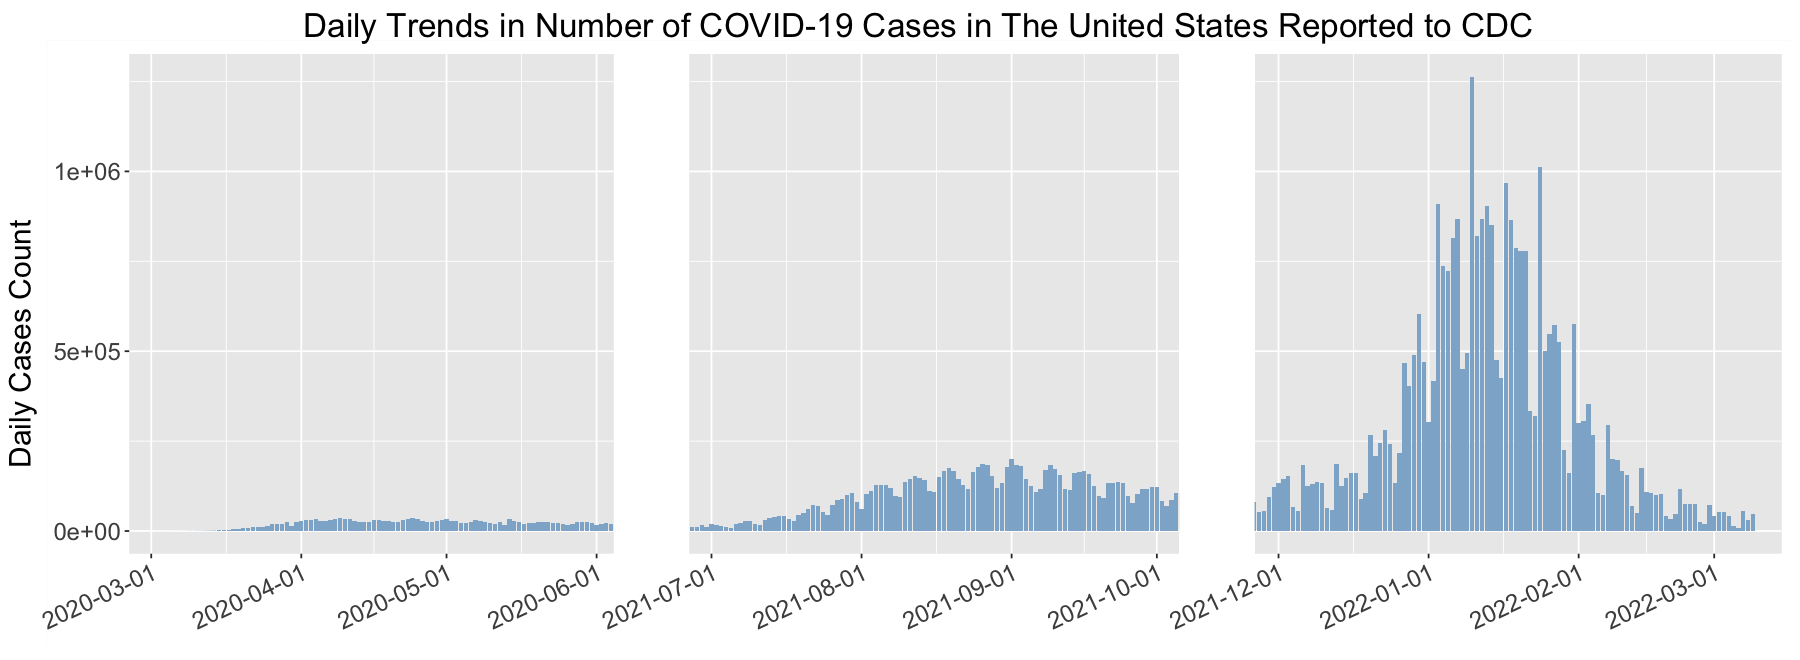

In [155]:
#original plot
library(ggplot2)
library(ggbreak) 
library(scales)
daily_caseData = read.csv(file = './data/data_table_for_daily_case_trends__the_united_states.csv',skip = 2,header = T)
daily_caseData$Date <- as.Date(daily_caseData$Date , format = "%B %d %Y")
options(repr.plot.width = 15, repr.plot.height = 5.5)

DailyBar <- ggplot(daily_caseData, aes(Date, New.Cases)) +
    geom_bar(stat="identity", na.rm = FALSE, fill ='#8eb2d1') +
    ggtitle("Daily Trends in Number of COVID-19 Cases in The United States Reported to CDC") +
    ylab("Daily Cases Count") + #xlab("Date") + 
    scale_x_date(labels=date_format("%Y-%m-%d"), #breaks=date_breaks("1 month"),
                 limits = as.Date(c('2020-03-01','2022-03-10')))+
    theme(text = element_text(size=18), axis.text.x = element_text(angle = 25, hjust =1),
          plot.title = element_text(hjust = 0.5))+
    scale_x_break(as.Date(c('2020-05-31','2021-07-01','2021-10-01','2021-12-01')),space=1.5)+
    theme(axis.text.x.top = element_blank(), axis.ticks.x.top = element_blank(), axis.line.x.top = element_blank(),
         axis.title.x=element_blank())+
    theme(plot.title = element_text(size = 20))
DailyBar


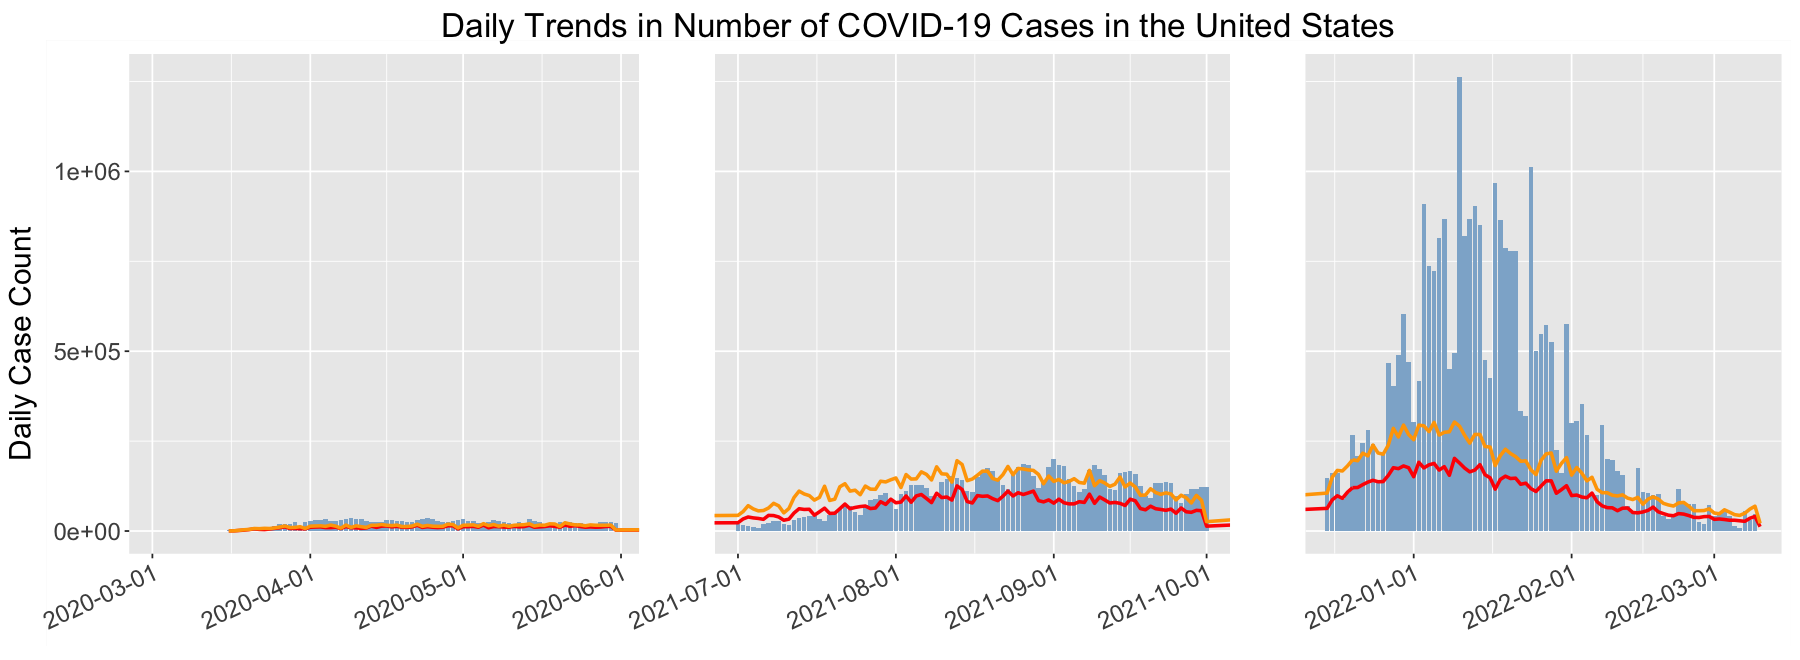

In [157]:
#original plot + our cases lines
library(ggplot2)
library(ggbreak) 
library(scales)
daily_caseData = read.csv(file = './data/data_table_for_daily_case_trends__the_united_states.csv',skip = 2,header = T)
daily_caseData$Date <- as.Date(daily_caseData$Date , format = "%B %d %Y")

Our_caseData = read.csv(file = './output_files/Our_cases_data_BioBERT.csv',header = T)
Our_caseData$Date <- as.Date(Our_caseData$Date , format = "%Y-%m-%d")

Our_case_cls_Data = read.csv(file = './output_files/Our_cases_cls_data_BioBERT.csv',header = T)
Our_case_cls_Data$Date <- as.Date(Our_case_cls_Data$date , format = "%Y-%m-%d")

TogetherCaseData = merge(daily_caseData,Our_caseData,by="Date")
TogetherCaseData = merge(TogetherCaseData, Our_case_cls_Data,by="Date")

TogetherCaseData$Our_cases1000 = TogetherCaseData$Our_cases * 500
TogetherCaseData$cls_count1000 = TogetherCaseData$cls_count * 500

options(repr.plot.width = 15, repr.plot.height = 5.5)

DailyBar <- ggplot(TogetherCaseData, aes(Date, New.Cases)) +
    geom_bar(stat="identity", na.rm = FALSE, fill ='#8eb2d1') +
    geom_line(aes(y = Our_cases1000), col = "red", cex=1)+
    geom_line(aes(y = cls_count1000), col = "orange", cex=1)+
    ggtitle("Daily Trends in Number of COVID-19 Cases in the United States") +
    ylab("Daily Case Count") + #xlab("Date") + 
    scale_x_date(labels=date_format("%Y-%m-%d"), #breaks=date_breaks("1 month"),
                 limits = as.Date(c('2020-03-01','2022-03-10')))+
    theme(text = element_text(size=18), axis.text.x = element_text(angle = 25, hjust =1),
          plot.title = element_text(hjust = 0.5))+
    scale_x_break(as.Date(c('2020-05-31','2021-07-01','2021-10-01','2021-12-15')),space=1.5)+
    theme(axis.text.x.top = element_blank(), axis.ticks.x.top = element_blank(), axis.line.x.top = element_blank(),
         axis.title.x=element_blank())+
    theme(plot.title = element_text(size = 20))
DailyBar


## just create a legend


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.1227 -1.2168”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.9824”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  6.9246e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 10.243”
`geom_smooth()` using method = 'loess'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.1227 -1.2168 -2.3849”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 4.084”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = para

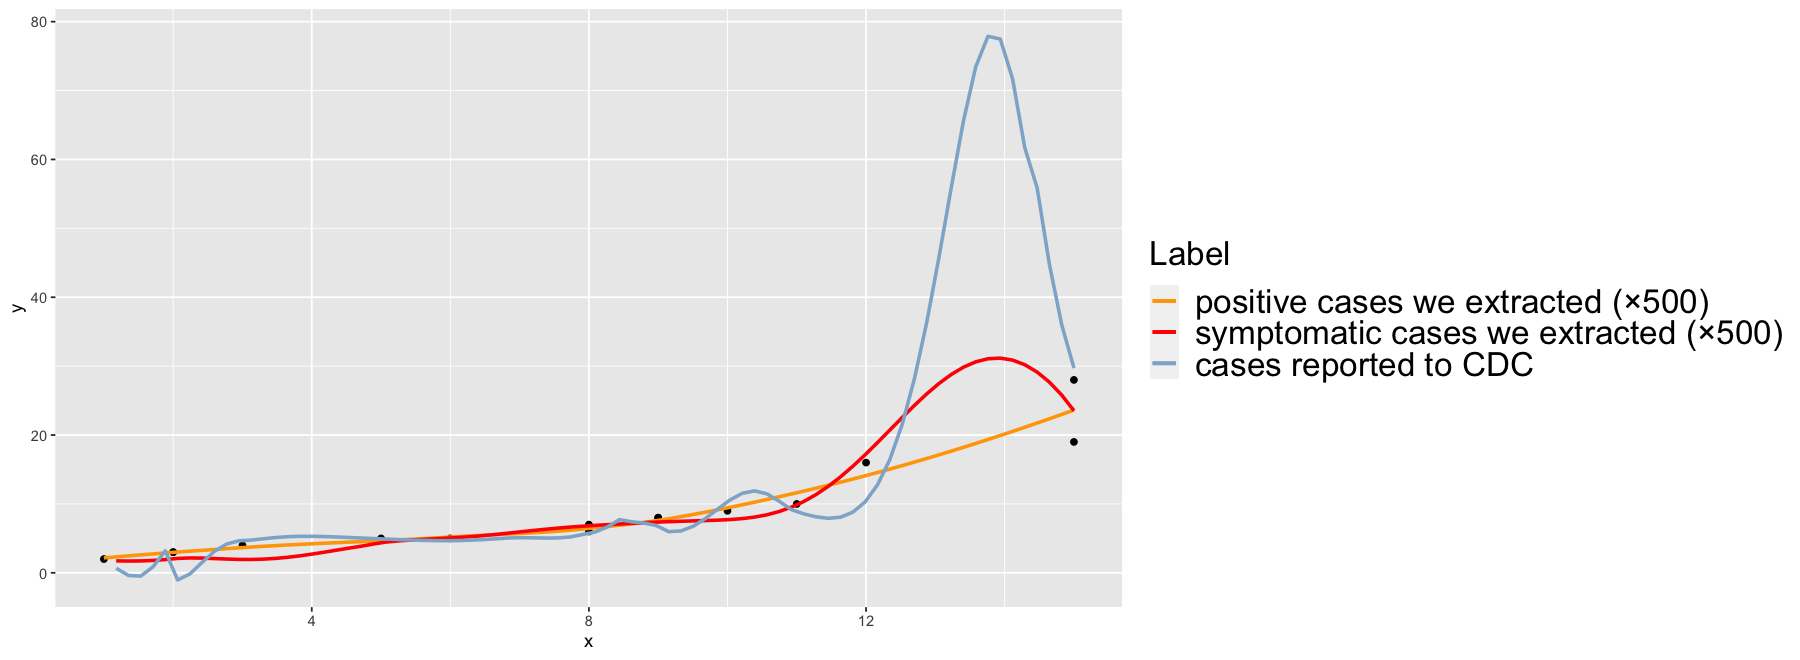

In [154]:
library(ggplot2)

#create data frame
df <- data.frame(x=c(1, 2, 2, 3, 5, 6, 8, 8, 9, 9, 10, 11, 12, 15, 15),
                 y=c(2, 3, 3, 4, 5, 5, 6, 7, 8, 8, 9, 10, 16, 19, 28))

#create plot with three fitted regression models
ggplot(df, aes(x, y)) +
  geom_point() +
  geom_smooth(se=FALSE, aes(color='positive cases we extracted (×500)')) +
  geom_smooth(formula=y~poly(x, 2), se=FALSE, aes(color='symptomatic cases we extracted (×500)')) +
  geom_smooth(formula=y~poly(x, 3), se=FALSE, aes(color='cases reported to CDC')) +
  scale_color_manual(name='Label',
                     breaks=c('positive cases we extracted (×500)', 
                              'symptomatic cases we extracted (×500)', 
                              'cases reported to CDC'),
                     values=c('cases reported to CDC'='#8eb2d1', 
                              'symptomatic cases we extracted (×500)'='red', 
                              'positive cases we extracted (×500)'='orange'))+
 theme(legend.title=element_text(size=20),
       legend.text=element_text(size=20))
